In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
!pip3 install -U openpyxl


In [3]:
df = pd.read_csv("./relatorio_cobertura_2024.csv", sep=";")
censo = pd.read_csv("./censo_regioes.csv", sep=";")

In [4]:
censo

,Nível,Cód.,regiao,0 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos
0,GR,1,Norte,1413023,1477405,1480622,1545379
1,GR,2,Nordeste,3635412,3883271,4031787,4244151
2,GR,3,Sudeste,4770928,5302986,5206810,5489267
3,GR,4,Sul,1776330,1915426,1833261,1910723
4,GR,5,Centro-Oeste,1109167,1170352,1122481,1186422


In [5]:
dados_regioes_uf = {
    'UF': ['AC', 'AL', 'AM', 'BA', 'CE', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 
           'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 
           'SP', 'SE', 'TO', 'AP', 'DF'],
    'regiao': ['Norte', 'Nordeste', 'Norte', 'Nordeste', 'Nordeste', 'Sudeste', 
               'Centro-Oeste', 'Nordeste', 'Centro-Oeste', 'Centro-Oeste', 'Sudeste', 
               'Norte', 'Nordeste', 'Sul', 'Nordeste', 'Nordeste', 'Sudeste', 
               'Nordeste', 'Sul', 'Norte', 'Norte', 'Sul', 'Sudeste', 'Nordeste', 
               'Norte', 'Norte','Centro-Oeste']
}

df_uf_regioes = pd.DataFrame(dados_regioes_uf)

In [6]:
dados_completos = pd.merge(df, df_uf_regioes, on='UF', how='inner')

In [7]:
colunas_para_somar = ['QTD MENORES 5 ANOS', 'POP. MENORES 5 ANOS', 'QTD DE 5 A 9 ANOS', 'POP. DE 5 A 9 ANOS', 'QTD ADOLESCENTES', 'POP. ADOLESCENTES'] 
dados_completos['QTD MENORES 5 ANOS'] = dados_completos['QTD MENORES 2 ANOS'] + dados_completos['QTD DE 2 A 4 ANOS']
dados_completos['POP. MENORES 5 ANOS'] = dados_completos['POP. MENORES 2 ANOS'] + dados_completos['POP. DE 2 A 4 ANOS']
df_grouped = dados_completos.groupby(['regiao'])[colunas_para_somar].sum().reset_index()

In [8]:
dados_completos_com_censo = pd.merge(df_grouped, censo, on='regiao', how='inner')

In [9]:
dados_completos_com_censo['adolescente'] = dados_completos_com_censo['10 a 14 anos'] + dados_completos_com_censo['15 a 19 anos']

In [10]:
dados_completos_com_censo

,regiao,QTD MENORES 5 ANOS,POP. MENORES 5 ANOS,QTD DE 5 A 9 ANOS,POP. DE 5 A 9 ANOS,QTD ADOLESCENTES,POP. ADOLESCENTES,Nível,Cód.,0 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,adolescente
0,Centro-Oeste,636217,1091297,541616,1155318,703697,2584087,GR,5,1109167,1170352,1122481,1186422,2308903
1,Nordeste,2510445,4299499,2124934,4698912,2511011,10543892,GR,2,3635412,3883271,4031787,4244151,8275938
2,Norte,1028270,1602955,914915,1692265,1250815,3504340,GR,1,1413023,1477405,1480622,1545379,3026001
3,Sudeste,2566496,5263872,2078317,5733332,2531943,13414602,GR,3,4770928,5302986,5206810,5489267,10696077
4,Sul,1050365,1786970,914356,1953320,1218008,4698293,GR,4,1776330,1915426,1833261,1910723,3743984


In [16]:
dados_completos_com_censo['cobertura_menores_5_anos'] = dados_completos_com_censo['QTD MENORES 5 ANOS'] / dados_completos_com_censo['0 a 4 anos']
dados_completos_com_censo['cobertura_5_ate_10_anos'] = dados_completos_com_censo['QTD DE 5 A 9 ANOS'] / dados_completos_com_censo['5 a 9 anos']
dados_completos_com_censo['cobertura_adolescentes'] = dados_completos_com_censo['QTD ADOLESCENTES'] / dados_completos_com_censo['adolescente']

In [17]:
dados_completos_com_censo.to_clipboard(decimal=",")

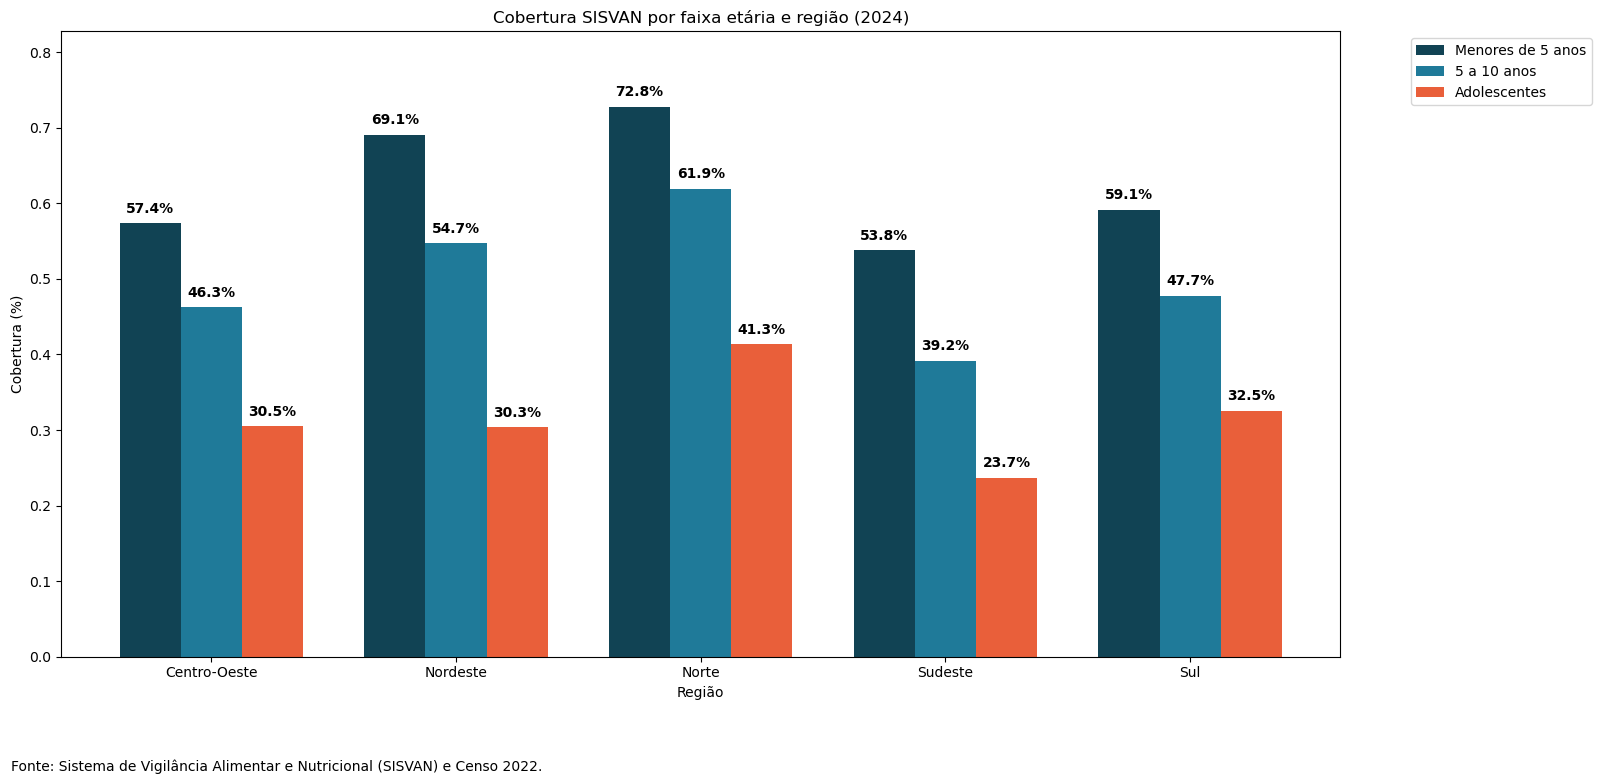

In [13]:
plt.figure(figsize=(16, 8))  

bar_width = 0.25
indices = np.arange(len(dados_completos_com_censo))

bars1 = plt.bar(indices - bar_width, dados_completos_com_censo['cobertura_menores_5_anos'], width=bar_width, label='Menores de 5 anos', color='#114354')
bars2 = plt.bar(indices, dados_completos_com_censo['cobertura_5_ate_10_anos'], width=bar_width, label='5 a 10 anos', color='#1F7A99')
bars3 = plt.bar(indices + bar_width, dados_completos_com_censo['cobertura_adolescentes'], width=bar_width, label='Adolescentes', color='#E95F3A')

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            f'{height*100:.1f}%', 
            ha='center', va='bottom', fontsize=10, fontweight='bold'
        )

plt.title('Cobertura SISVAN por faixa etária e região (2024)')
plt.xlabel('Região')
plt.ylabel('Cobertura (%)')
plt.xticks(indices, dados_completos_com_censo['regiao'])

plt.ylim(0, max(dados_completos_com_censo[['cobertura_menores_5_anos', 'cobertura_5_ate_10_anos', 'cobertura_adolescentes']].max()) + 0.1)

plt.figtext(0.01, -0.02, "Fonte: Sistema de Vigilância Alimentar e Nutricional (SISVAN) e Censo 2022.", ha="left", fontsize=10)

plt.tight_layout(rect=[0, 0.05, 0.85, 0.95])  
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
